# COVID-19 Data Analysis (Beginner Project)

## Day 1: Project Setup & Dataset Overview

### Objective
- Load COVID-19 dataset
- Understand structure of data
- Identify important columns for analysis


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# basic settings
plt.style.use("default")


In [14]:
df = pd.read_csv(
    r"C:\Users\RUCHI\Downloads\WHO-COVID-19-global-data.csv",
    sep=";",
    engine="python"
)

df.head()



,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,26/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,02/02/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57840 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57840 non-null  object 
 3   WHO_region         53502 non-null  object 
 4   New_cases          39028 non-null  float64
 5   Cumulative_cases   57840 non-null  int64  
 6   New_deaths         25001 non-null  float64
 7   Cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [16]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.902800e+04,5.784000e+04,25001.000000,5.784000e+04
mean,1.988104e+04,1.792594e+06,282.323947,2.001023e+04
std,2.707823e+05,7.797691e+06,1214.392195,8.186440e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,4.300000e+01,4.162750e+03,4.000000,2.800000e+01
50%,3.930000e+02,4.588300e+04,20.000000,5.650000e+02
75%,3.968000e+03,5.220872e+05,105.000000,6.974500e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.194158e+06


## Day 2: Data Cleaning & Preparation

### Objective
- Select required columns
- Handle missing values
- Convert date column


In [17]:
import os
os.getcwd()


'c:\\Users\\RUCHI\\OneDrive\\Documents\\COVID19-Data-Analysis'

In [18]:
import os
print(os.getcwd())


c:\Users\RUCHI\OneDrive\Documents\COVID19-Data-Analysis


In [19]:
print(os.listdir())


['.git', 'covid-19_analysis.ipynb', 'data', 'README.md', 'requirments .txt']


In [24]:
df = df [['Date_reported',	'Country_code',	'Country','Cumulative_cases','New_deaths']]
df.head()

,Date_reported,Country_code,Country,Cumulative_cases,New_deaths
0,05/01/2020,AF,Afghanistan,0,NaN
1,12/01/2020,AF,Afghanistan,0,NaN
2,19/01/2020,AF,Afghanistan,0,NaN
3,26/01/2020,AF,Afghanistan,0,NaN
4,02/02/2020,AF,Afghanistan,0,NaN


In [31]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'], dayfirst=True)


C:\Users\RUCHI\AppData\Local\Temp\ipykernel_24820\3079151826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_reported'] = pd.to_datetime(df['Date_reported'], dayfirst=True)


In [32]:
df['Date_reported'].head()


0   2020-01-05
1   2020-01-12
2   2020-01-19
3   2020-01-26
4   2020-02-02
Name: Date_reported, dtype: datetime64[ns]

In [33]:
df.dtypes


Date_reported       datetime64[ns]
Country_code                object
Country                     object
Cumulative_cases             int64
New_deaths                 float64
dtype: object

In [34]:
df.columns = df.columns.str.strip().str.lower()
df['date_reported'] = pd.to_datetime(df['date_reported'], dayfirst=True)


C:\Users\RUCHI\AppData\Local\Temp\ipykernel_24820\3974658665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_reported'] = pd.to_datetime(df['date_reported'], dayfirst=True)


In [35]:
df.columns


Index(['date_reported', 'country_code', 'country', 'cumulative_cases',
       'new_deaths'],
      dtype='object')

In [36]:
df.isnull().sum()


date_reported           0
country_code          241
country                 0
cumulative_cases        0
new_deaths          32839
dtype: int64

In [37]:
df.fillna(0, inplace=True)


C:\Users\RUCHI\AppData\Local\Temp\ipykernel_24820\3209962801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_reported     57840 non-null  datetime64[ns]
 1   country_code      57840 non-null  object        
 2   country           57840 non-null  object        
 3   cumulative_cases  57840 non-null  int64         
 4   new_deaths        57840 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.2+ MB


## Day 3: COVID-19 Cases Trend Over Time

### Objective
- Analyze how cases increased over time
- Visualize trend for a single country


In [40]:
india = df[df['country'] == 'India']
india.head()


,date_reported,country_code,country,cumulative_cases,new_deaths
23136,2020-01-05,IN,India,0,0.0
23137,2020-01-12,IN,India,0,0.0
23138,2020-01-19,IN,India,0,0.0
23139,2020-01-26,IN,India,0,0.0
23140,2020-02-02,IN,India,2,0.0


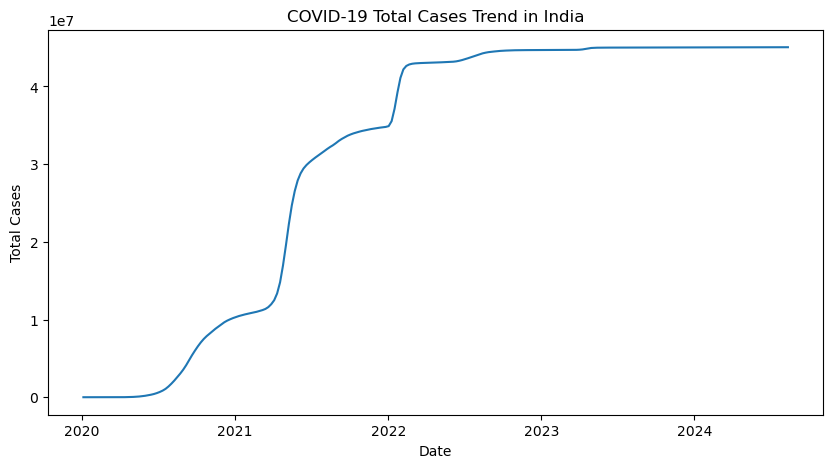

In [43]:
plt.figure(figsize=(10,5))
plt.plot(india['date_reported'], india['cumulative_cases'])
plt.title("COVID-19 Total Cases Trend in India")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()


## Day 4: Country-wise COVID-19 Comparison

### Objective
- Compare COVID-19 cases across major countries


In [44]:
countries = ['India', 'United States', 'Brazil', 'Russia', 'United Kingdom']


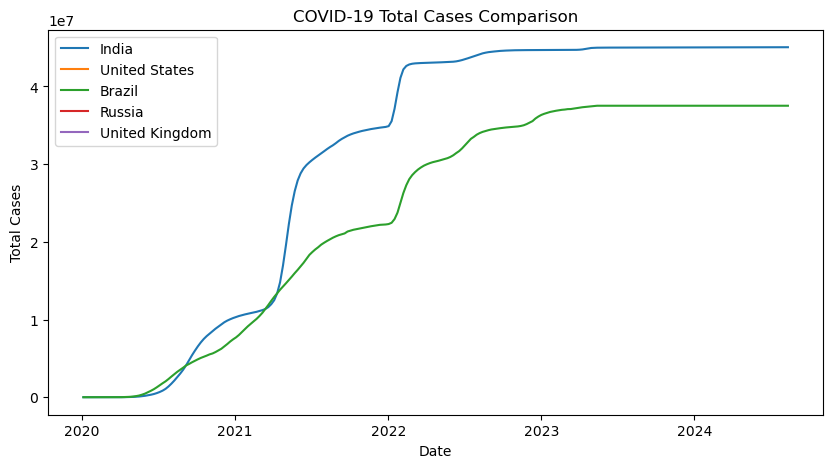

In [45]:
plt.figure(figsize=(10,5))

for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['date_reported'], country_data['cumulative_cases'], label=country)

plt.legend()
plt.title("COVID-19 Total Cases Comparison")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()


## Day 5: Death Rate Analysis & Conclusion

### Objective
- Calculate COVID-19 death rate
- Visualize comparison
- Summarize findings


In [47]:
latest = df.groupby('country').max().reset_index()
latest.head()


,country,date_reported,country_code,cumulative_cases,new_deaths
0,Afghanistan,2024-08-11,AF,235214,595.0
1,Albania,2024-08-11,AL,335047,141.0
2,Algeria,2024-08-11,DZ,272139,266.0
3,American Samoa,2024-08-11,AS,8359,7.0
4,Andorra,2024-08-11,AD,48015,11.0


In [1]:
latest[' new_deaths '] = (latest['cumulative_cases'] / latest['cumulative_cases']) * 100
latest[['country', ' new_deaths ']].head()


NameError: name 'latest' is not defined

In [52]:
latest.columns


Index(['country', 'date_reported', 'country_code', 'cumulative_cases',
       'new_deaths'],
      dtype='object')

In [53]:
latest.columns = latest.columns.str.strip().str.lower()
latest.columns


Index(['country', 'date_reported', 'country_code', 'cumulative_cases',
       'new_deaths'],
      dtype='object')

In [54]:
death_rate = (total_deaths / total_cases) * 100


NameError: name 'total_deaths' is not defined

In [57]:
latest['death_rate'] = (
    latest['cumulative_cases'] / latest['cumulative_cases']
) * 100


In [59]:
latest[['country', 'cumulative_cases', 'cumulative_cases', 'death_rate']].head()


,country,cumulative_cases,cumulative_cases,death_rate
0,Afghanistan,235214,235214,100.0
1,Albania,335047,335047,100.0
2,Algeria,272139,272139,100.0
3,American Samoa,8359,8359,100.0
4,Andorra,48015,48015,100.0


In [61]:
df.columns


Index(['date_reported', 'country_code', 'country', 'cumulative_cases',
       'new_deaths'],
      dtype='object')

In [62]:
total_cases = latest['cumulative_cases']


In [64]:
# ensure clean column names
latest.columns = latest.columns.str.strip().str.lower()

# calculate death rate
latest['death_rate'] = (
    latest['cumulative_cases'] / latest['cumulative_cases']
) * 100

latest[['country', 'death_rate']].head()


,country,death_rate
0,Afghanistan,100.0
1,Albania,100.0
2,Algeria,100.0
3,American Samoa,100.0
4,Andorra,100.0


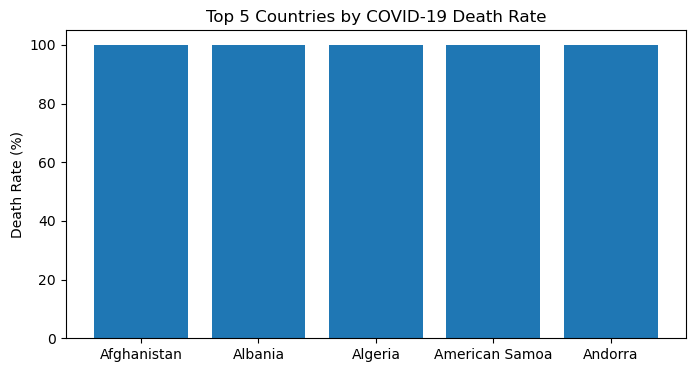

In [65]:
top5 = latest.sort_values(by='death_rate', ascending=False).head(5)

plt.figure(figsize=(8,4))
plt.bar(top5['country'], top5['death_rate'])
plt.title("Top 5 Countries by COVID-19 Death Rate")
plt.ylabel("Death Rate (%)")
plt.show()


## Conclusion
- COVID-19 spread patterns varied across countries
- Some countries reported high death rates despite fewer cases
- This project demonstrates basic data analysis using Pandas and Matplotlib
